In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualize each Disease consists of how many symptom

The median number of symptoms across all diseases is: 9.0


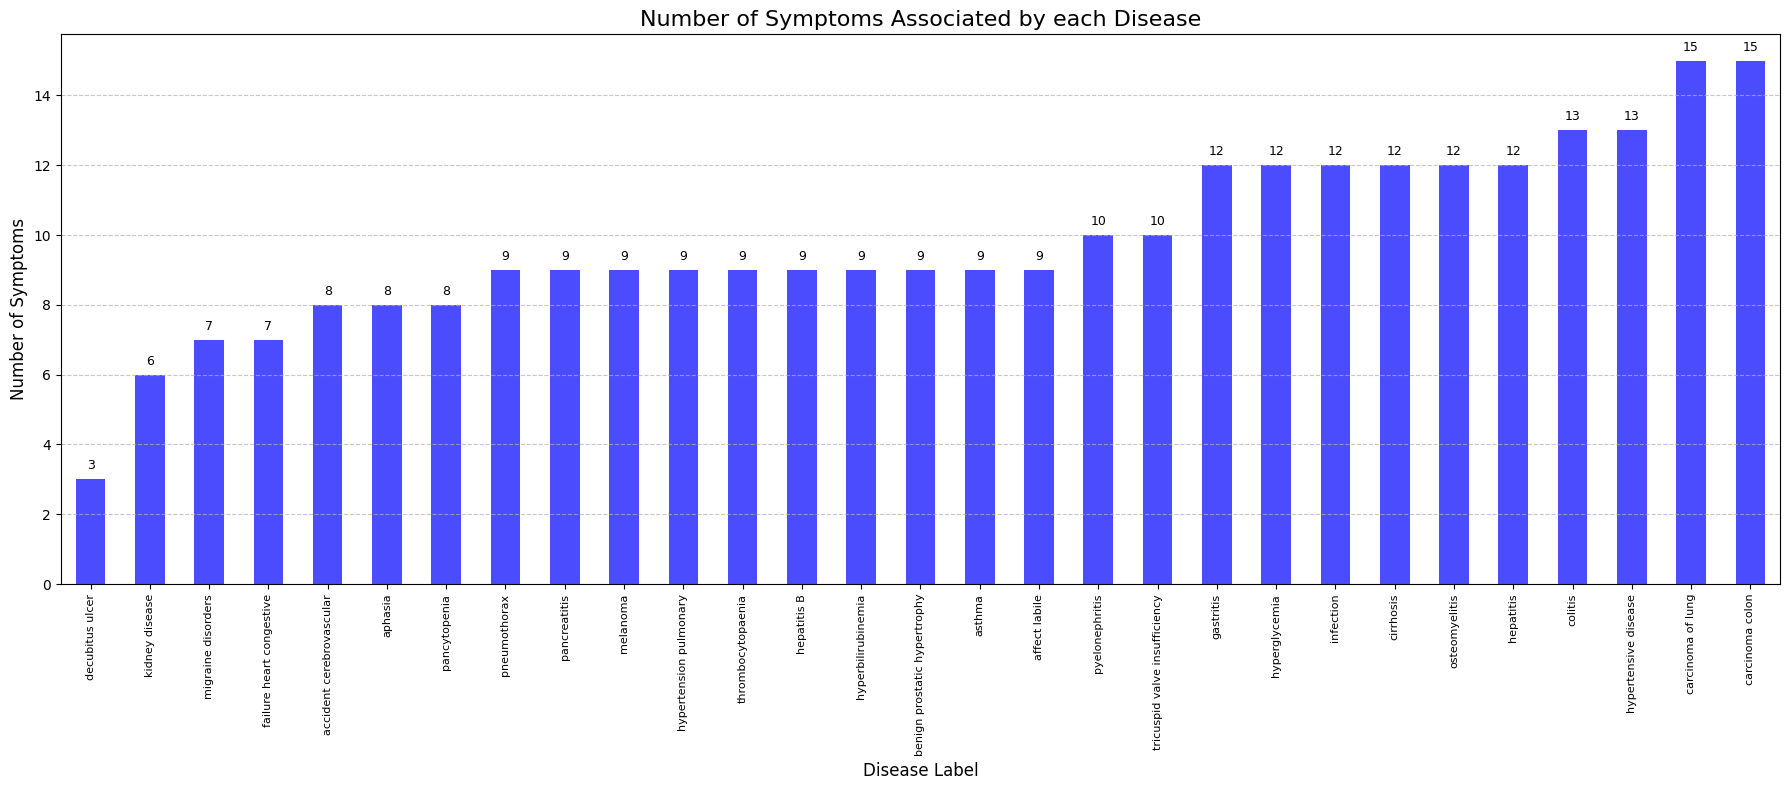

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/reduced8.csv')

# Calculate the number of symptoms associated with each disease
data['symptom_count'] = data.iloc[:, :-1].sum(axis=1)  # Sum the 1s in symptom columns (assumes last column is disease_label)
disease_symptom_counts = data.groupby('disease_label')['symptom_count'].mean()

# Visualize the number of symptoms per disease
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Calculate the median number of symptoms
median_symptoms = disease_symptom_counts.median()

# Print the result
print(f"The median number of symptoms across all diseases is: {median_symptoms}")

# Customize the plot
plt.title("Number of Symptoms Associated by each Disease", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
print(data['disease_label'].unique())
print("\n Total number of unique diseases: ", data['disease_label'].nunique())

['hypertensive disease' 'failure heart congestive'
 'accident cerebrovascular' 'asthma' 'infection'
 'benign prostatic hypertrophy' 'pancreatitis' 'hypertension pulmonary'
 'thrombocytopaenia' 'colitis' 'hepatitis B'
 'tricuspid valve insufficiency' 'kidney disease' 'carcinoma colon'
 'melanoma' 'carcinoma of lung' 'aphasia' 'pyelonephritis' 'pneumothorax'
 'hyperbilirubinemia' 'migraine disorders' 'pancytopenia' 'affect labile'
 'decubitus ulcer' 'cirrhosis' 'osteomyelitis' 'gastritis' 'hepatitis'
 'hyperglycemia']

 Total number of unique diseases:  29


# Find out how many overlapping symptoms for each disease

In [3]:
import pandas as pd

# Load your dataset (adjust the file path as necessary)
file_path = '/content/drive/MyDrive/P2/T1.2/Dataset/rawdata.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Group by disease_label and sum the symptom columns to get a binary vector for each disease
disease_symptom_matrix = data.groupby('disease_label').sum()

# Create a DataFrame to store the overlap counts
overlap_matrix = pd.DataFrame(index=disease_symptom_matrix.index, columns=disease_symptom_matrix.index, dtype=int)

# Compute overlaps by calculating the intersection of symptoms
for disease1 in disease_symptom_matrix.index:
    for disease2 in disease_symptom_matrix.index:
        overlap_matrix.loc[disease1, disease2] = (disease_symptom_matrix.loc[disease1] & disease_symptom_matrix.loc[disease2]).sum()

# Save the result as a CSV file
overlap_matrix.to_csv('/content/disease_symptom_overlap_matrix.csv')

# Display the first few rows of the overlap matrix
print("Symptom Overlap Matrix:")
print(overlap_matrix.head())

# Optionally, download the matrix file
from google.colab import files
files.download('/content/disease_symptom_overlap_matrix.csv')


Symptom Overlap Matrix:
disease_label                    tonic-clonic seizures  Alzheimer's disease  \
disease_label                                                                 
 tonic-clonic seizures                            17.0                  2.0   
Alzheimer's disease                                2.0                 18.0   
HIV                                                1.0                  2.0   
Pneumocystis carinii pneumonia                     2.0                  0.0   
accident cerebrovascular                           1.0                  1.0   

disease_label                    HIV  Pneumocystis carinii pneumonia  \
disease_label                                                          
 tonic-clonic seizures           1.0                             2.0   
Alzheimer's disease              2.0                             0.0   
HIV                             14.0                             5.0   
Pneumocystis carinii pneumonia   5.0                          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1.0 Remove more than 13 symptoms' disease

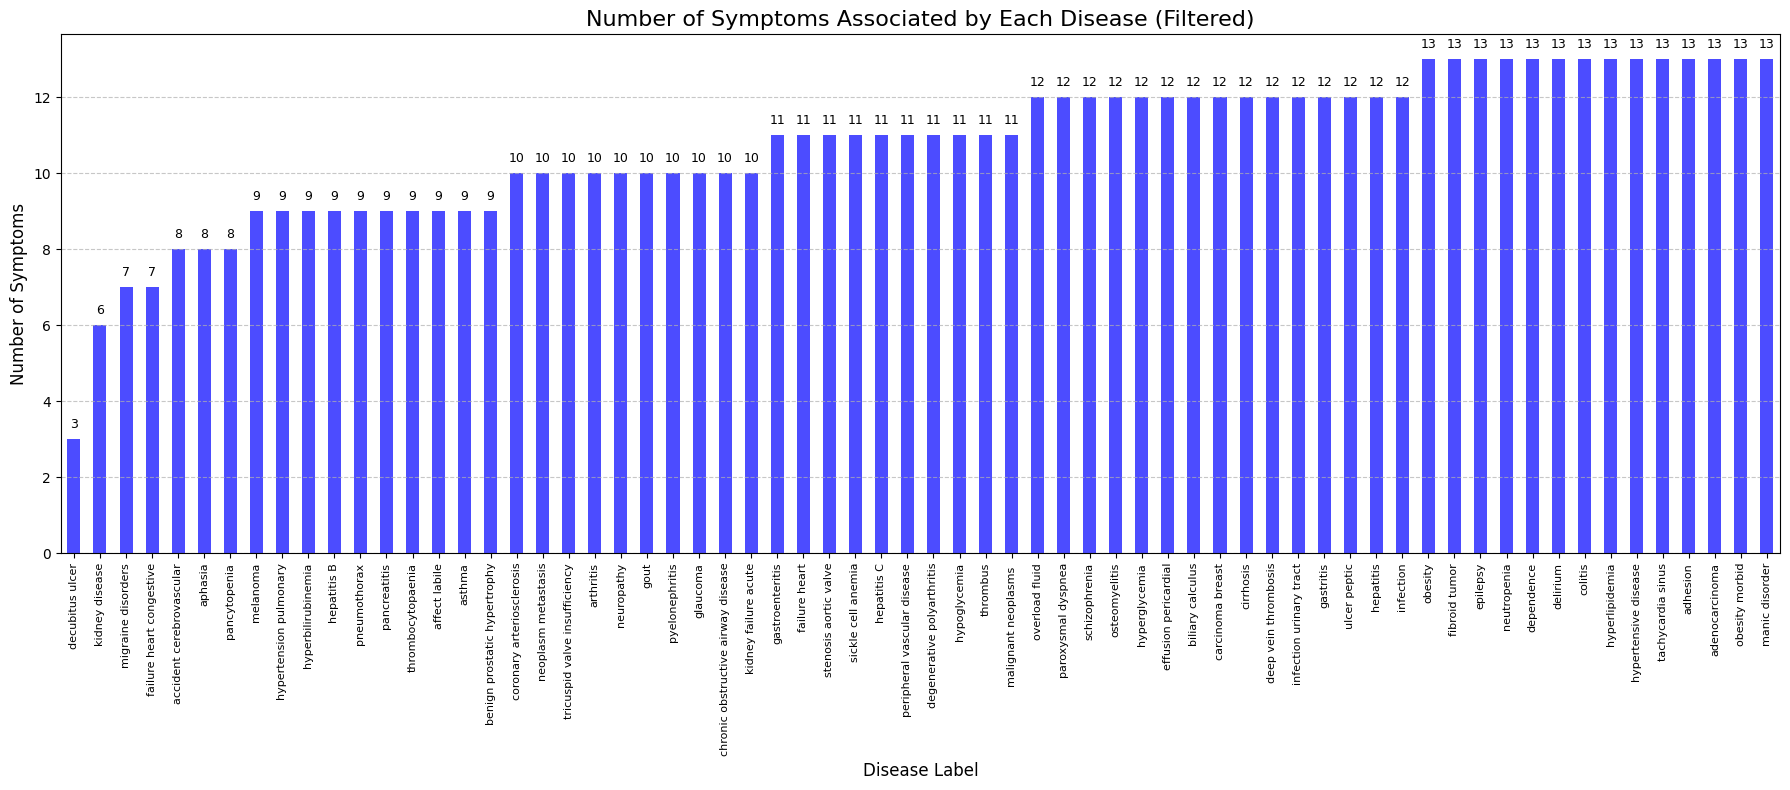

Diseases with more than 13 symptoms have been removed. Filtered dataset saved as 'filtered_data.csv'.
The list of the disease label are:  ['hypertensive disease' 'diabetes' 'depression'
 'coronary arteriosclerosis' 'pneumonia' 'failure heart congestive'
 'accident cerebrovascular' 'asthma' 'myocardial infarction'
 'hypercholesterolemia' 'infection' 'infection urinary tract' 'anemia'
 'chronic obstructive airway disease' 'dementia' 'insufficiency renal'
 'confusion' 'degenerative polyarthritis' 'hypothyroidism' 'anxiety state'
 'malignant neoplasms ' 'HIV' 'cellulitis'
 'gastroesophageal reflux disease' 'septicemia' 'deep vein thrombosis'
 'dehydration' 'neoplasm' 'embolism pulmonary' 'epilepsy' 'cardiomyopathy'
 'chronic kidney failure' 'carcinoma' 'hepatitis C'
 'peripheral vascular disease' 'psychotic disorder' 'hyperlipidemia'
 'bipolar disorder' 'obesity' 'ischemia' 'cirrhosis' 'exanthema'
 'benign prostatic hypertrophy' 'kidney failure acute'
 'mitral valve insufficiency' 'arthrit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/rawdata.csv')

# Calculate the number of symptoms associated with each disease
# Assuming the last column is 'disease_label' and other columns are symptoms
data['symptom_count'] = data.iloc[:, :-1].sum(axis=1)

# Filter out rows where the symptom count exceeds 13
filtered_data = data[data['symptom_count'] <= 13]

# Drop the 'symptom_count' column as it was for filtering purposes
filtered_data = filtered_data.drop(columns=['symptom_count'])

# Save the filtered dataset
filtered_data.to_csv('/content/drive/MyDrive/P2/T1.2/Dataset/remove_data.csv', index=False)

# Calculate the number of symptoms associated with each disease
filtered_data['symptom_count'] = filtered_data.iloc[:, :-1].sum(axis=1)
disease_symptom_counts = filtered_data.groupby('disease_label')['symptom_count'].mean()

# Visualize the data distribution
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Symptoms Associated by Each Disease (Filtered)", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print a message indicating completion
print("Diseases with more than 13 symptoms have been removed. Filtered dataset saved as 'filtered_data.csv'.")

print("The list of the disease label are: ", data['disease_label'].unique())

# 2.0 Remain only certain diseases

<ipython-input-8-a75fbc3d7361>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_diseases['symptom_count'] = filtered_diseases.iloc[:, :-1].sum(axis=1)


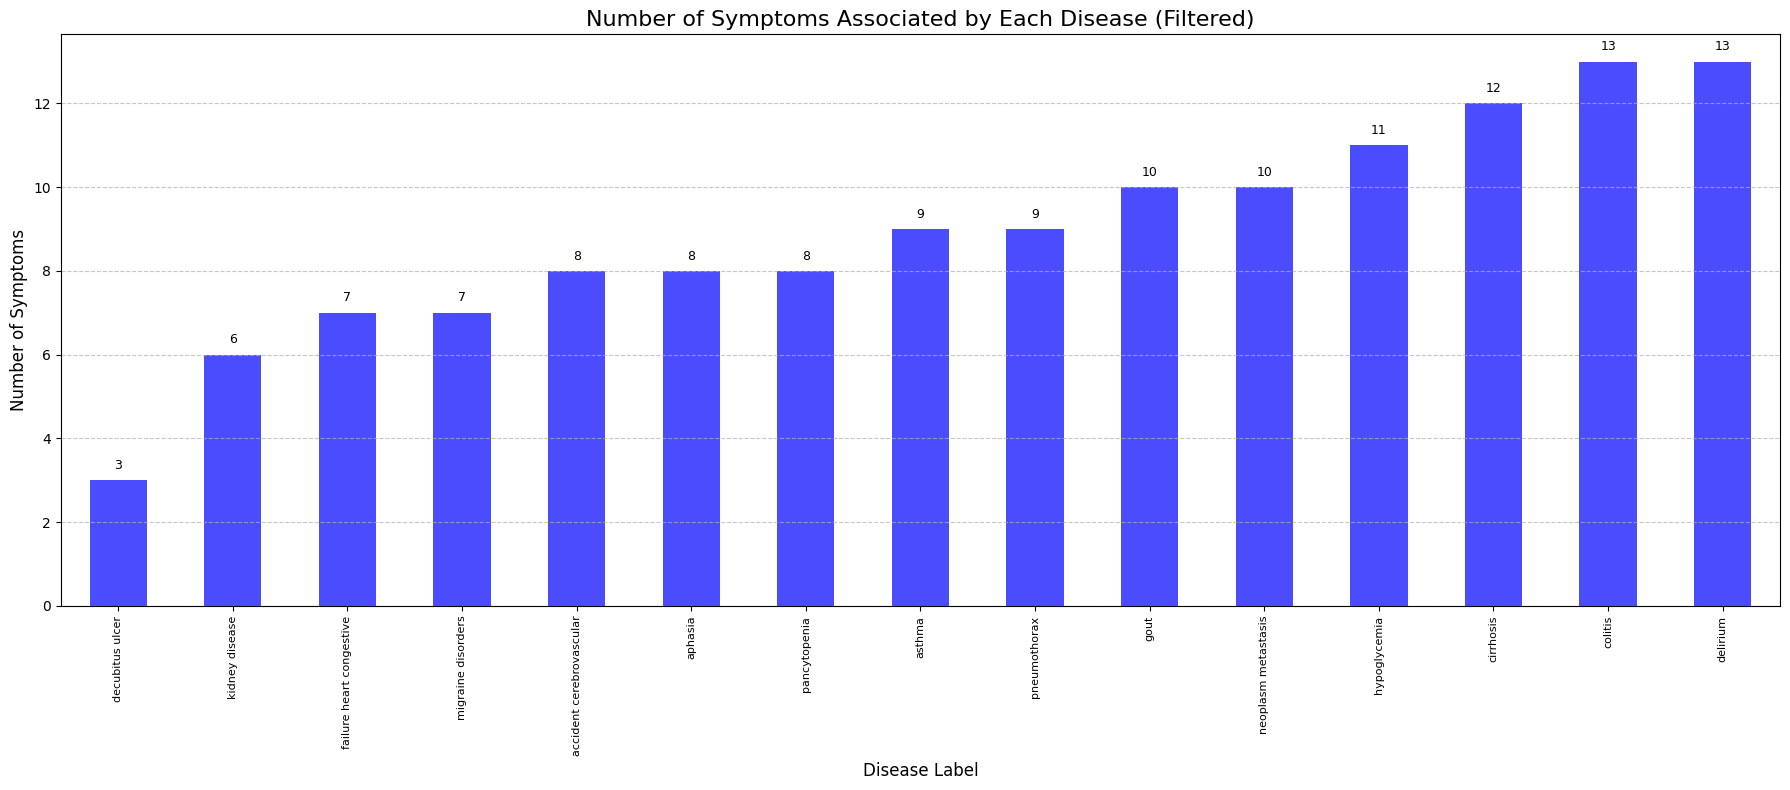

The dataset has been filtered to retain only the specified diseases. Saved as 'specified_diseases.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/remove_data.csv')

# Define the list of diseases to retain
diseases_to_keep = [
    "decubitus ulcer", "kidney disease", "migraine disorders", "failure heart congestive",
    "accident cerebrovascular", "aphasia", "pancytopenia",
    "pneumothorax", "asthma",
    "gout", "neoplasm metastasis",
    "hypoglycemia", "cirrhosis", "delirium", "colitis"
]

# Filter the dataset to retain only the specified diseases
filtered_diseases = data[data['disease_label'].isin(diseases_to_keep)]

# Save the updated dataset
filtered_diseases.to_csv('/content/drive/MyDrive/P2/T1.2/Dataset/specified_diseases.csv', index=False)

# Calculate the number of symptoms associated with each disease
filtered_diseases['symptom_count'] = filtered_diseases.iloc[:, :-1].sum(axis=1)
disease_symptom_counts = filtered_diseases.groupby('disease_label')['symptom_count'].mean()

# Visualize the data distribution
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Symptoms Associated by Each Disease (Filtered)", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print a message indicating completion
print("The dataset has been filtered to retain only the specified diseases. Saved as 'specified_diseases.csv'.")


In [ ]:
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/remove_data.csv')

# Define the list of diseases to retain
diseases_to_keep = [
    "decubitus ulcer", "kidney disease", "migraine disorders", "failure heart congestive",
    "accident cerebrovascular", "aphasia", "pancytopenia", "melanoma", "hypertension pulmonary",
    "hyperbilirubinemia", "hepatitis B", "pneumothorax", "pancreatitis", "thrombocytopaenia", "affect labile", "asthma",
    "gout", "arthritis", "glaucoma", "thrombus", "coronary arteriosclerosis", "neoplasm metastasis", "neuropathy",
    "gastroenteritis", "hypoglycemia", "cirrhosis", "infection urinary tract", "delirium", "colitis"
]

# Filter the dataset to retain only the specified diseases
filtered_diseases = data[data['disease_label'].isin(diseases_to_keep)]

# Save the updated dataset
filtered_diseases.to_csv('/content/drive/MyDrive/P2/T1.2/Dataset/specified_diseases.csv', index=False)

# Calculate the number of symptoms associated with each disease
filtered_diseases['symptom_count'] = filtered_diseases.iloc[:, :-1].sum(axis=1)
disease_symptom_counts = filtered_diseases.groupby('disease_label')['symptom_count'].mean()

# Visualize the data distribution
plt.figure(figsize=(18, 8))
bars = disease_symptom_counts.sort_values().plot(kind='bar', color='blue', alpha=0.7)

# Add the number of symptoms on top of each bar
for index, value in enumerate(disease_symptom_counts.sort_values()):
    plt.text(index, value + 0.2, f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Symptoms Associated by Each Disease (Filtered)", fontsize=16)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Symptoms", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print a message indicating completion
print("The dataset has been filtered to retain only the specified diseases. Saved as 'specified_diseases.csv'.")
"""

# 2.0 Remove "0" Symptoms Column

In [ ]:
import pandas as pd

# Load your dataset
data_latest = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/specified_diseases.csv")  # Replace with your file path

# Identify columns with all zero values
zero_columns_latest = data_latest.columns[(data_latest == 0).all()]

# Display the number of such columns and their names
print(f"Number of columns with all zeros: {len(zero_columns_latest)}")
if len(zero_columns_latest) > 0:
    print("Columns with all zeros:")
    print(zero_columns_latest.tolist())
else:
    print("No columns with all zeros.")


Number of columns with all zeros: 300
Columns with all zeros:
['yellow sputum', 'heavy feeling', 'polymyalgia', 'stinging sensation', 'palpitation', 'hypokalemia', 'blanch', 'monocytosis', 'noisy respiration', 'pallor', 'feces in rectum', 'sneeze', 'feeling hopeless', 'sputum purulent', 'left atrial hypertrophy', 'welt', 'intermenstrual heavy bleeding', 'ecchymosis', 'phonophobia', 'fear of falling', 'rhonchus', 'inappropriate affect', 'anosmia', 'adverse effect', 'hacking cough', 'scar tissue', 'breath sounds decreased', "Heberden's node", 'hyperventilation', 'neologism', 'hemianopsia homonymous', 'mydriasis', 'constipation', 'pain foot', 'heme positive', 'pin-point pupils', 'groggy', 'tremor', 'large-for-dates fetus', 'general discomfort', 'feeling strange', 'immobile', 'asymptomatic', 'urinary hesitation', 'history of - blackout', 'hoard', 'side pain', 'hematocrit decreased', 'moan', 'unhappy', 'dysdiadochokinesia', 'heavy legs', 'headache', 'bradykinesia', 'bedridden', 'hirsutism',

In [ ]:
# Drop the columns with all zero values
columns_to_drop = zero_columns_latest

# Drop the columns from the DataFrame
data_cleaned = data_latest.drop(columns=columns_to_drop)

# Save the cleaned dataset
data_cleaned.to_csv("/content/drive/MyDrive/P2/T1.2/Dataset/no_zero.csv", index=False)

# Print confirmation
print(f"Removed {len(columns_to_drop)} columns: {columns_to_drop}")
print("Cleaned dataset saved to 'cleaned_dataset.csv'.")

Removed 300 columns: Index(['yellow sputum', 'heavy feeling', 'polymyalgia', 'stinging sensation',
       'palpitation', 'hypokalemia', 'blanch', 'monocytosis',
       'noisy respiration', 'pallor',
       ...
       'flatulence', 'myalgia', 'breath-holding spell', 'para 2',
       'numbness of hand', 'Murphy's sign', 'air fluid level',
       'muscle hypotonia', 'weight gain', 'blackout'],
      dtype='object', length=300)
Cleaned dataset saved to 'cleaned_dataset.csv'.


In [ ]:
import pandas as pd

# Load your dataset
data_latest = pd.read_csv("/content/drive/MyDrive/P2/T1.2/Dataset/no_zero.csv")

# Identify columns with all zero values
zero_columns_latest = data_latest.columns[(data_latest == 0).all()]

# Display the number of such columns and their names
print(f"Number of columns with all zeros: {len(zero_columns_latest)}")
if len(zero_columns_latest) > 0:
    print("Columns with all zeros:")
    print(zero_columns_latest.tolist())
else:
    print("No columns with all zeros.")

Number of columns with all zeros: 0
No columns with all zeros.


# List out Unique Diseases

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/P2/T1.2/Dataset/no_zero.csv')
print("disease_list: ", df['disease_label'].unique())
print("\n\n total diseases: ", df['disease_label'].nunique())

disease_list:  ['failure heart congestive' 'accident cerebrovascular' 'asthma'
 'cirrhosis' 'gout' 'hypoglycemia' 'colitis' 'kidney disease'
 'neoplasm metastasis' 'aphasia' 'pneumothorax' 'delirium'
 'migraine disorders' 'pancytopenia' 'decubitus ulcer']


 total diseases:  15


In [ ]:
# Count the number of columns
num_columns = len(df.columns)

print(f"Total number of columns/symptoms: {num_columns}")

Total number of columns/symptoms: 107
